In [1]:
import os
import google.generativeai as genai


genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 64,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}

model = genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  generation_config=generation_config,
)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
data = pd.read_csv('./data/train_u6lujuX_CVtuZ9i.csv')

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

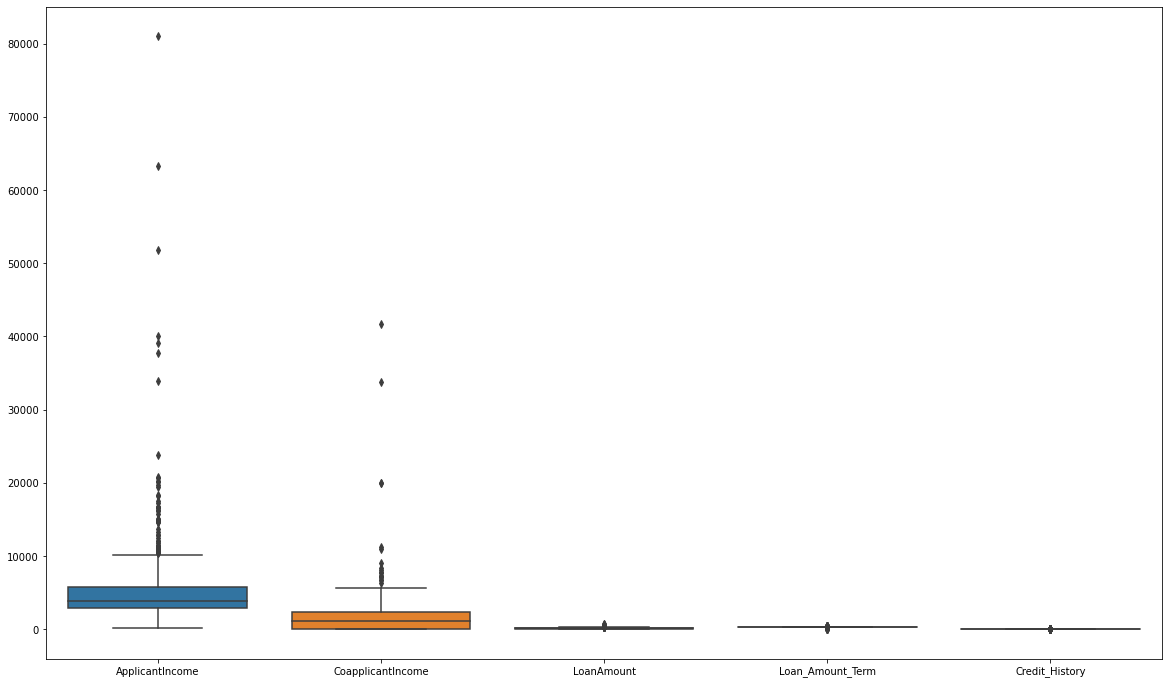

In [7]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=data)

In [8]:
# Fill the null values of numerical datatype
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

In [9]:
# Fill the null values of object datatype
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [10]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [11]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of peaple who took loan by gender
Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

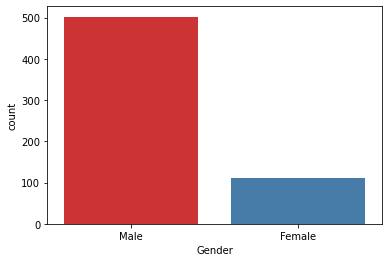

In [12]:
print("Number of peaple who took loan by gender")
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, palette='Set1')

Number of peaple who took loan by marital status
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

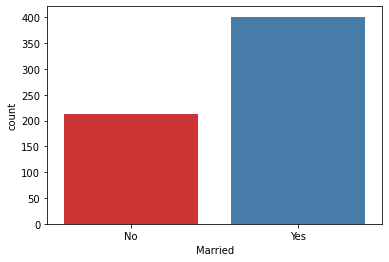

In [13]:
print("Number of peaple who took loan by marital status")
print(data['Married'].value_counts())
sns.countplot(x='Married', data=data, palette='Set1')

Number of people who took loan by Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

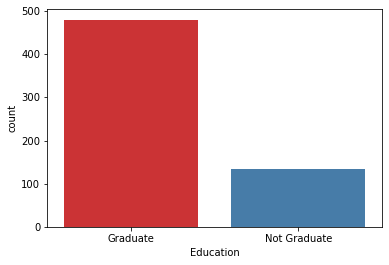

In [14]:
print("Number of people who took loan by Education")
print(data['Education'].value_counts())
sns.countplot(x='Education', data=data, palette='Set1')

<AxesSubplot:>

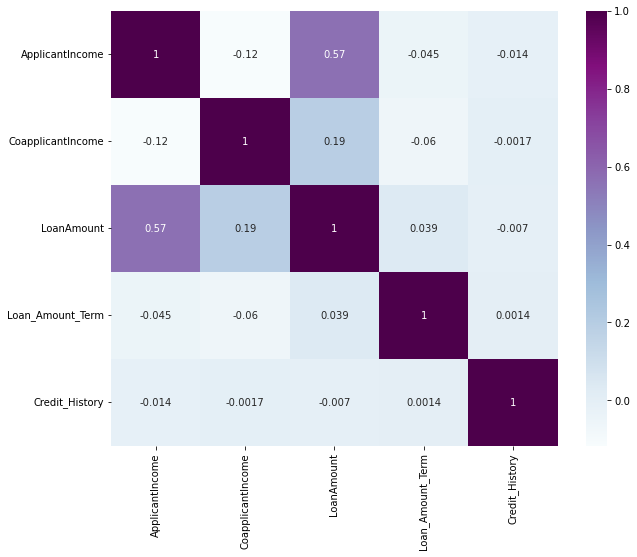

In [15]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='BuPu')

In [16]:
corr = data.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


In [17]:
# Total Applicant Income

data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<AxesSubplot:xlabel='ApplicantIncomelog', ylabel='Density'>

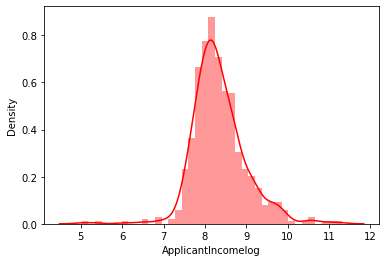

In [18]:
# Applying Transformation on

data['ApplicantIncomelog'] = np.log(data['ApplicantIncome'] + 1)
sns.distplot(data['ApplicantIncomelog'], color='r')

<AxesSubplot:xlabel='Loan_Amount_Term_log', ylabel='Density'>

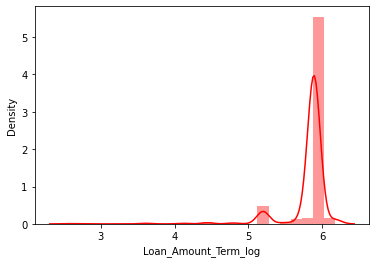

In [19]:
data['Loan_Amount_Term_log'] = np.log(data['Loan_Amount_Term'] + 1)
sns.distplot(data['Loan_Amount_Term_log'], color='r')

In [20]:
# Drropping unneccessary col

In [21]:
data.dtypes

Loan_ID                  object
Gender                   object
Married                  object
Dependents               object
Education                object
Self_Employed            object
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area            object
Loan_Status              object
Total_Income            float64
ApplicantIncomelog      float64
Loan_Amount_Term_log    float64
dtype: object

In [22]:
model.generate_content([f"How :\n{data}"])

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "It seems you've provided a snippet of a Pandas DataFrame. Let's break down what this information represents and how it's likely being used.\n\n**What is this Data?**\n\nThis data looks like it's from a loan application dataset. Here's a breakdown of the columns:\n\n* **Loan_ID:** A unique identifier for each loan application.\n* **Gender:**  The gender of the applicant (Male/Female).\n* **Married:**  Marital status of the applicant (Yes/No).\n* **Dependents:**  Number of dependents the applicant has (0, 1, 2, 3+).\n* **Education:** Educational qualification of the applicant (Graduate/Not Graduate).\n* **Self_Employed:** Whether the applicant is self-employed (Yes/No).\n* **ApplicantIncome:** Monthly income of the applicant.\n* **CoapplicantIncome:** Monthly 